In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
plt.style.use('bmh')

# Weibull

In [8]:
from scipy.stats import weibull_min

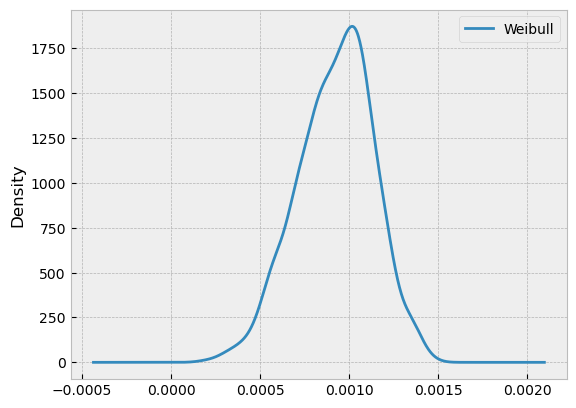

In [11]:
shape = 5
scale = .001
weibull_samples = weibull_min.rvs(shape, 0, scale, size=1000)
pd.DataFrame(weibull_samples).plot(kind='density')
plt.legend(['Weibull'])

Stanford heart transplant data:
- `time`: survival time
- `status`: censoring status

In [13]:
df = pd.read_csv('./data/stanford2.csv')
df.head()

,Unnamed: 0,id,time,status,age,t5
0,139,139,86.0,1,12,1.26
1,159,159,10.0,1,13,1.49
2,181,181,60.0,0,13,NaN
3,119,119,1116.0,0,14,0.54
4,74,74,2006.0,0,15,1.26


In [16]:
from sklearn.model_selection import train_test_split
from lifelines import WeibullFitter

In [18]:
train, test = train_test_split(df)
wbf = WeibullFitter().fit(train['time'], train['status'])

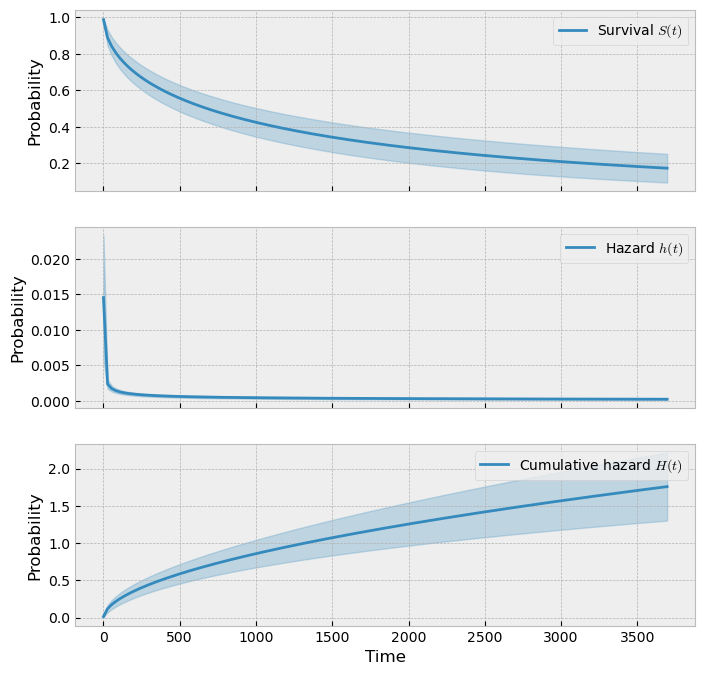

In [30]:
fig, axs = plt.subplots(3, figsize=(8, 8), sharex=True)

wbf.plot_survival_function(label=r'Survival $S(t)$', ax=axs[0]).legend();
axs[0].set_ylabel('Probability');

wbf.plot_hazard(label=r'Hazard $h(t)$', ax=axs[1]).legend();
axs[1].set_ylabel('Probability');

wbf.plot_cumulative_hazard(label=r'Cumulative hazard $H(t)$', ax=axs[2]).legend();
axs[2].set_ylabel('Probability');
axs[2].set_xlabel('Time');

- `rho_`: $\kappa$
- `lambda_`: $1/\rho$

In [27]:
wbf.lambda_, wbf.rho_

(1321.8593061001288, 0.5486660515998556)

In [32]:
def brier_score(actual, estimated):
    n = len(actual)
    error = 0
    for i in range(n):
        error += math.pow(estimated.iloc[i]-actual.iloc[i], 2)
    return error/n

In [34]:
estimated_sp = wbf.predict(test['time'])
brier_score(test['status'], 1 - estimated_sp)

0.3707744119430984